In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import math
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# to import the stored data
data = pd.read_csv(r'/content/drive/MyDrive/Research Paper/DATA/REV_Right.csv')

print(data.shape)

data.head()

(300, 18)


,Mean,SD,Variance,Kurtosis,Median,Mode,sum,Skewness,max,min,range,RMS,Impulse Factor,Shape factor,k factor,Std error,count,condition
0,0.012772,0.437381,0.191302,5.342062,0.014769,-0.008984,153.258346,0.032538,4.004789,-2.741048,6.745836,0.003993,0.437549,313.571589,34.259759,1.752293,12000,A
1,0.014417,0.418080,0.174791,4.385488,0.018220,0.094777,173.007315,0.032495,2.631105,-2.109695,4.740800,0.003817,0.418311,182.496682,29.014552,1.100620,12000,A
2,0.014378,0.431913,0.186549,5.562181,0.015721,0.045721,172.537400,0.114481,4.449711,-2.172830,6.622541,0.003943,0.432134,309.478007,30.055013,1.922873,12000,A
3,0.013630,0.427076,0.182394,4.709016,0.021047,0.052514,163.556063,-0.039930,2.915184,-2.337422,5.252606,0.003899,0.427276,213.885129,31.348952,1.245588,12000,A
4,0.012050,0.422334,0.178366,4.681749,0.016703,0.086143,144.594708,-0.096269,2.863474,-2.747296,5.610770,0.003855,0.422488,237.641385,35.062540,1.209784,12000,A


In [ ]:
'''
to check the data imbalance
'''
data['condition '].value_counts()

A    50
F    50
D    50
B    50
E    50
C    50
Name: condition , dtype: int64

**The above cell tells us that the data is BALANCED and we have total 6 classes i.e. [A,B,C,D,E,,F]**

In [ ]:
'''
to check whether the data has any NAN values
'''

null_count_per_column = data.isna().sum().reset_index()

null_count_per_column.columns = ['Column_name', "Count"]

null_count_per_column

,Column_name,Count
0,Mean,0
1,SD,0
2,Variance,0
3,Kurtosis,0
4,Median,0
5,Mode,0
6,sum,0
7,Skewness,0
8,max,0
9,min,0


**So we have NO NULL Values**

In [ ]:
data.describe()

,Mean,SD,Variance,Kurtosis,Median,Mode,sum,Skewness,max,min,range,RMS,Impulse Factor,Shape factor,k factor,Std error,count
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,0.011943,0.480069,0.240004,9.717797,0.012907,0.012471,143.317737,0.194175,4.518174,-3.601774,8.119948,0.409757,343.631531,79.472326,7.312935,0.250165,12000.0
std,0.002398,0.097822,0.107697,5.932031,0.003821,0.054514,28.773851,0.263950,1.666549,1.388466,2.914601,0.204951,203.849575,83.153513,11.075831,0.560553,0.0
min,0.005737,0.362894,0.131692,3.224990,0.003136,-0.134419,68.847354,-0.289862,1.380955,-7.757596,2.886788,0.003624,0.397132,20.742209,0.514370,0.003313,12000.0
25%,0.010375,0.410313,0.168357,4.618729,0.010209,-0.024159,124.497662,0.016784,3.238507,-4.655651,5.600103,0.396375,213.192309,37.310513,1.601732,0.003765,12000.0
50%,0.011695,0.438244,0.192058,7.723986,0.012939,0.012127,140.334742,0.122307,4.372383,-3.507954,8.109345,0.432514,376.170448,43.967744,2.612502,0.004429,12000.0
75%,0.013627,0.539621,0.291192,14.081282,0.015416,0.050667,163.526206,0.381310,5.701736,-2.377782,10.369079,0.539704,495.153857,62.770352,4.140746,0.005767,12000.0
max,0.019851,0.876043,0.767451,31.345290,0.023963,0.160339,238.215835,1.422589,9.290301,-1.460847,16.855100,0.876093,801.253904,424.848918,39.744871,2.057474,12000.0


In [ ]:
'''
to check the number of unique values in each column
'''
column_names = data.columns
column_names = np.array(column_names)

column_name_unique_value = dict()

for name in column_names:

  unique_values = len(pd.unique(data[name]))
  column_name_unique_value[name] = unique_values

print(column_name_unique_value)

{'Mean ': 300, 'SD': 300, 'Variance': 300, 'Kurtosis': 300, 'Median': 231, 'Mode': 300, 'sum': 300, 'Skewness ': 300, 'max': 300, 'min': 300, 'range': 300, 'RMS': 297, ' Impulse Factor': 300, 'Shape factor': 300, 'k factor': 300, 'Std error': 283, 'count': 1, 'condition ': 6}


**From the above cell output, you can see that the "COUNT" column consists of a single value and hence it is of no use**

In [ ]:
def return_TSNE_data(data, labels):

  from sklearn.manifold import TSNE

  visualization_data = data

  # the "visualization_data_labels" should be a numpy array and so the "labels" argument should also be a numpy array
  visualization_data_labels = labels
  

  # to convert the pandas df into numpy array in order to pass the data to the TSNE object
  visualization_data = np.array(visualization_data)

  tsne = TSNE(n_components=2, perplexity = 15, random_state=0, n_iter=2000, n_iter_without_progress=400, learning_rate = 200)

  transformed_visualization_data = tsne.fit_transform(visualization_data)

  # to combine the data
  final_tsne_data = np.vstack((transformed_visualization_data.T, visualization_data_labels))

  final_tsne_data = final_tsne_data.T

  print(final_tsne_data.shape, type(final_tsne_data))


  #final_tsne_data = np.reshape(final_tsne_data, newshape = (300,3))
  

  # to convert it into dataframe
  tsne_df = pd.DataFrame(data = final_tsne_data, columns=['dim_1', 'dim_2', 'labels'])

  # return this "tsne_df" which can be then used to visualize the data
  return tsne_df

In [ ]:
labels = data['condition ']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels = encoder.fit_transform(labels)

print(type(labels), labels.shape)

<class 'numpy.ndarray'> (300,)


(300, 3) <class 'numpy.ndarray'>


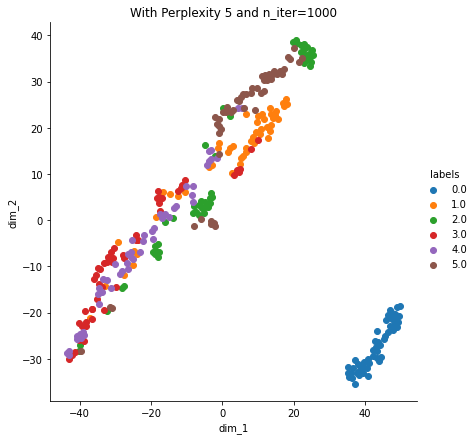

In [ ]:
temp_data = data.drop(['condition '], axis = 1)
tsne_df = return_TSNE_data(temp_data, labels)


sns.FacetGrid(tsne_df, hue='labels', size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()

plt.title('With Perplexity 5 and n_iter=1000')
plt.savefig("initial_data_visualization.png")
plt.show()

**From the plot that is shown above, we can see that we are only able to distinctively separate one class from the rest. So there is a lot of noise in the data and we need to get rid of their noise to get a better visualization of it.**

In [ ]:
# now we will split the data into X and Y
X = data.drop(['condition '], axis = 1)
Y = data['condition ']

print(type(X), type(Y))
print(X.shape, Y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(300, 17) (300,)


In [ ]:
X.columns

Index(['Mean ', 'SD', 'Variance', 'Kurtosis', 'Median', 'Mode', 'sum',
       'Skewness ', 'max', 'min', 'range', 'RMS', ' Impulse Factor',
       'Shape factor', 'k factor', 'Std error', 'count'],
      dtype='object')

In [ ]:
'''
to remove the count column as it has a single value
'''
X = X.drop(['count'], axis = 1)
print(X.shape)

(300, 16)


In [ ]:
# to split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.166, stratify = Y, random_state = 42)

print(type(X_train), type(Y_train))
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(250, 16) (50, 16)
(250,) (50,)


In [ ]:
X_train.head()

,Mean,SD,Variance,Kurtosis,Median,Mode,sum,Skewness,max,min,range,RMS,Impulse Factor,Shape factor,k factor,Std error
287,0.009181,0.416964,0.173859,5.941319,0.008551,0.056093,110.167944,0.274380,3.844778,-2.121655,5.966434,0.417048,418.790976,45.426782,1.603457,0.003806
175,0.012859,0.563631,0.317679,18.972485,0.014591,0.110233,154.305820,0.211248,6.289679,-5.260687,11.550366,0.563754,489.133526,43.841805,3.545831,0.005145
71,0.015342,0.432226,0.186819,12.982116,0.013043,0.019960,184.106808,0.693773,5.772517,-3.010012,8.782530,0.432480,376.250109,28.188849,2.496498,0.003946
282,0.010423,0.409318,0.167541,3.955840,0.008938,-0.079440,125.074418,0.050947,2.566720,-2.379374,4.946094,0.409434,246.258527,39.282248,1.050902,0.003737
65,0.013495,0.404747,0.163820,7.358580,0.011318,0.042215,161.940549,0.094428,3.878042,-4.197384,8.075426,0.404955,287.367826,30.007649,1.570431,0.003695


In [ ]:
'''
To transform the output data labels
'''
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

print(type(Y_test))
print(Y_test)

<class 'numpy.ndarray'>
[5 4 4 0 0 1 0 0 5 2 4 2 1 3 4 3 0 0 1 1 3 5 1 0 3 5 3 1 3 5 0 4 2 5 2 4 2
 2 3 4 3 5 1 1 4 5 2 2 3 4]


**I will now make use of Recursive Feature elimination in order to extract the best features. The estimator that I am going to use are
Decision Trees. The reason behind using Decision Trees as the estimators is that, the number of data points and the data features are
less comparatively. So decision trees is the best option to look for redundant data and remove that**

In [ ]:
'''
To use Decision Tree Classifier
'''
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(max_depth = 8, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto')

decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

predicted_output = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, predicted_output)

print("The accuracy of the Decision Tree classifier is:- ", accuracy)

The accuracy of the Decision Tree classifier is:-  0.9


**Now as the Decision Tree Classifier is giving good result despite of classes being crowded as we saw in the 1st TSNE plot, there are certainyl some features that more important than the other and the Decision Tree is successfully able to leverage it. So there is a definite decrease in the Entropy**

In [ ]:
# to extract the feature importance values
feature_importances = decision_tree_classifier.feature_importances_
print(type(feature_importances), feature_importances)

<class 'numpy.ndarray'> [0.00925738 0.21937633 0.00480012 0.01570949 0.         0.00720018
 0.08588097 0.01715881 0.         0.13612961 0.1311355  0.
 0.         0.07785539 0.20128725 0.09420897]


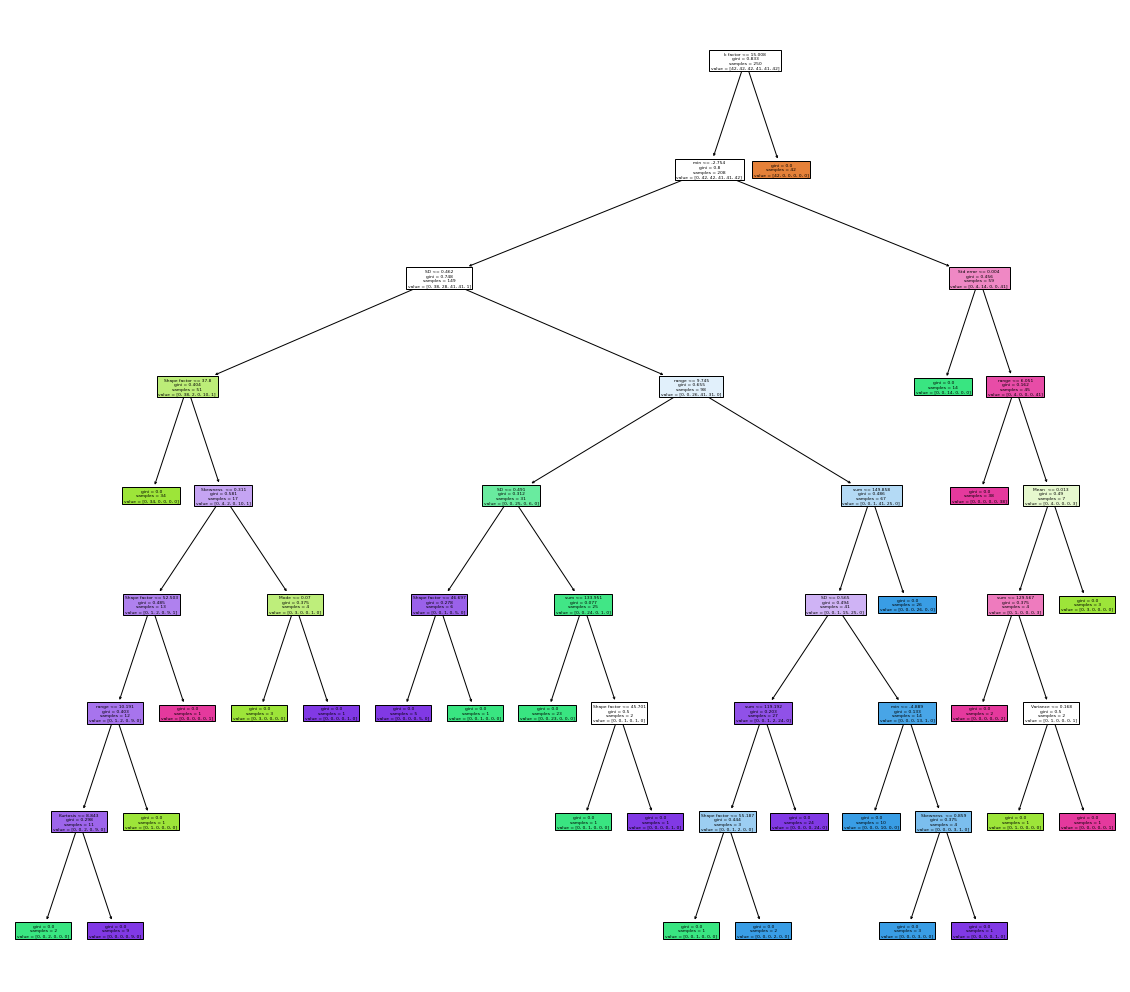

In [ ]:
fig = plt.figure(figsize = (20,18))
from sklearn import tree
_ = tree.plot_tree(decision_tree_classifier, feature_names = X_train.columns, filled = True)

In [ ]:
'''
to save the decision Tree figure
'''
fig.savefig("decision_tree.png")

In [ ]:
'''
Now to take all the extracted feature importance values and see the most important features
'''
column_names = X_train.columns
feature_importance_dict = dict()

for column_name, importance_value in zip(column_names, feature_importances):

  feature_importance_dict[column_name] = importance_value

# to sort the dictinoary based on the importance value in the descending order
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key = lambda item:item[1], reverse = True))

print(len(sorted_feature_importance_dict))
print(sorted_feature_importance_dict)

16
{'SD': 0.2193763331498257, 'k factor': 0.20128724526117098, 'min': 0.13612960966347012, 'range': 0.13113550329210413, 'Std error': 0.09420896542183117, 'sum': 0.08588096601622557, 'Shape factor': 0.07785538676305949, 'Skewness ': 0.01715881030626782, 'Kurtosis': 0.015709493072113556, 'Mean ': 0.009257379846066914, 'Mode': 0.007200184324718712, 'Variance': 0.004800122883145809, 'Median': 0.0, 'max': 0.0, 'RMS': 0.0, ' Impulse Factor': 0.0}


**Now everytime you train a Decision Tree, you will get a different accuracy and based on that accuracy, there will be some features which have the most importance and there will be some features which will have absolutely 0 importance. The trend is that, usually 3 features have 0 importance value. So after seeing this, it is confirmed that not all features are useful. So to eliminate the redundant features, we will make use of forward feature selection or Recursive feature Elimination with CV to remove the redundant features and make the dataset more robust**

In [ ]:
'''
To use RFE to extract the top 13 features from the given 16 features as everytime there are 3 features which have a feature
importance value of 0. I am using RFECV and NOT RFE because, while using the optimizer, the parameters are going to be evaluated
using 10 fold CV. So instead of forcing the model to select any 13 features without taking 10-Fold CV into account would not be a 
good choice
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

estimator = DecisionTreeClassifier(max_depth = 8, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto')

stratified_kfold_splitter = StratifiedKFold(10)

feature_selector = RFECV(estimator, step = 1, min_features_to_select = 5, n_jobs=-1, 
                         cv = stratified_kfold_splitter, scoring = 'accuracy', verbose = 1)

feature_selector.fit(X_train, Y_train)

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=8,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'),
      min_features_to_select=5, n_jobs=-1, scoring='accuracy', step=1,
      verbose=1)

In [ ]:
ranking = feature_selector.ranking_
print('The rankings are:- ',ranking)

feature_rank_dict = dict()

for name, rank in zip(column_names, ranking):

  feature_rank_dict[name] = rank

sorted_feature_rank_dict = dict(sorted(feature_rank_dict.items(), key = lambda item:item[1], reverse = False))
print(sorted_feature_rank_dict)

The rankings are:-  [ 8  1 10  1  6  7  1  3  2  1  1  1  9  1  4  5]
{'SD': 1, 'Kurtosis': 1, 'sum': 1, 'min': 1, 'range': 1, 'RMS': 1, 'Shape factor': 1, 'max': 2, 'Skewness ': 3, 'k factor': 4, 'Std error': 5, 'Median': 6, 'Mode': 7, 'Mean ': 8, ' Impulse Factor': 9, 'Variance': 10}


In [ ]:
X_train.columns

Index(['Mean ', 'SD', 'Variance', 'Kurtosis', 'Median', 'Mode', 'sum',
       'Skewness ', 'max', 'min', 'range', 'RMS', ' Impulse Factor',
       'Shape factor', 'k factor', 'Std error'],
      dtype='object')

In [ ]:
'''
SD, Mode, Median are the features that should be removed from the existing dataset
'''
X_train_13 = X_train.drop(['Mean ', 'Variance', ' Impulse Factor'], axis = 1)
X_test_13 = X_test.drop(['Mean ', 'Variance', ' Impulse Factor'], axis = 1)

print(X_train_13.shape, X_test_13.shape)

(250, 13) (50, 13)


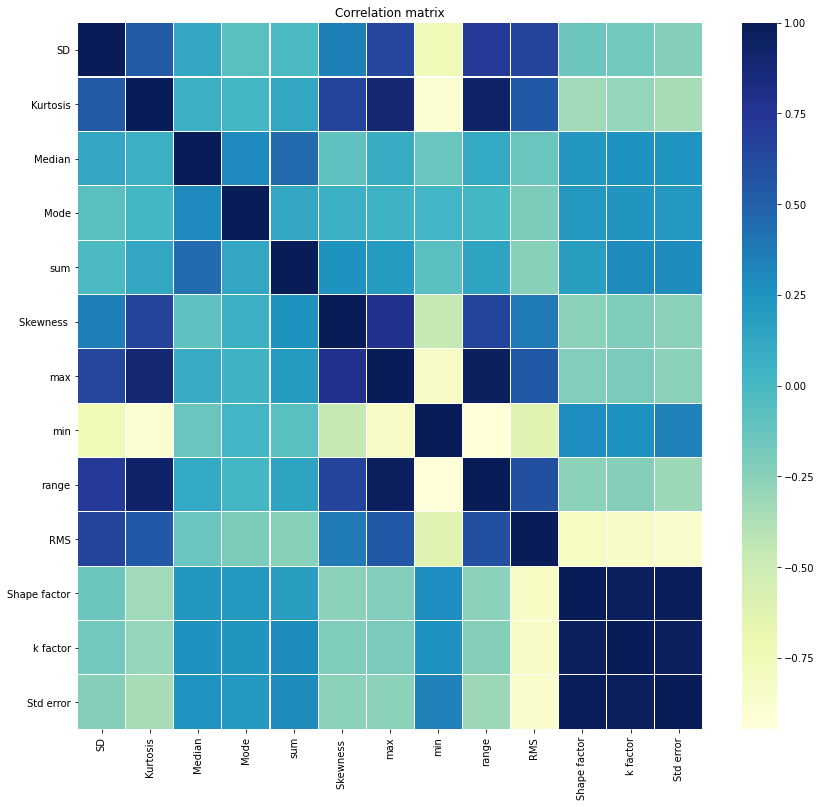

In [ ]:
'''
To check the correlation between the top 13 selected features
'''
correlation_matrix_for_13_features = X_train_13.corr()

f, ax = plt.subplots(figsize =(14, 13))

plt.title('Correlation matrix')

sns.heatmap(correlation_matrix_for_13_features, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [ ]:
X_train_11 = X_train_13.drop(['Std error', 'k factor'], axis = 1)
X_test_11 = X_test_13.drop(['Std error', 'k factor'], axis = 1)

print(X_train_11.shape, X_test_11.shape)

(250, 11) (50, 11)


(250, 3) <class 'numpy.ndarray'>


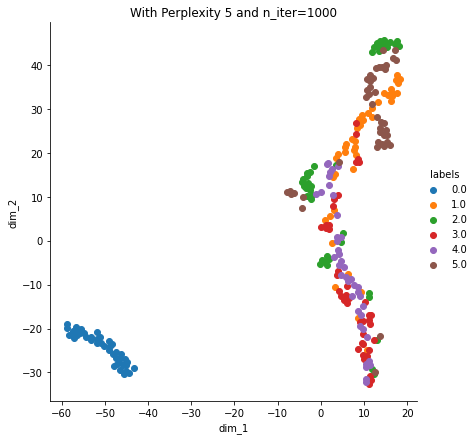

In [ ]:
tsne_df = return_TSNE_data(X_train_11, Y_train)

sns.FacetGrid(tsne_df, hue='labels', size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.title('With Perplexity 5 and n_iter=1000')
plt.show()

# **To restore the original features which worked the best together**

To bring back or write the features which worked the best together by doing running the classifier multiple times and observing each feature.

(250, 3) <class 'numpy.ndarray'>


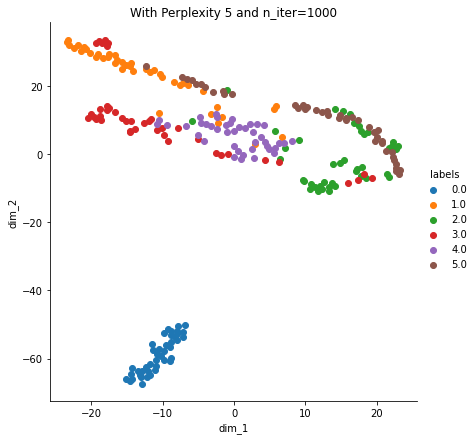

In [ ]:
X_train_13_new = X_train[['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor', 'k factor', 'Std error']]
X_test_13_new = X_test[['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor', 'k factor', 'Std error']]

tsne_df = return_TSNE_data(X_train_13_new, Y_train)

sns.FacetGrid(tsne_df, hue='labels', size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.title('With Perplexity 5 and n_iter=1000')
plt.show()

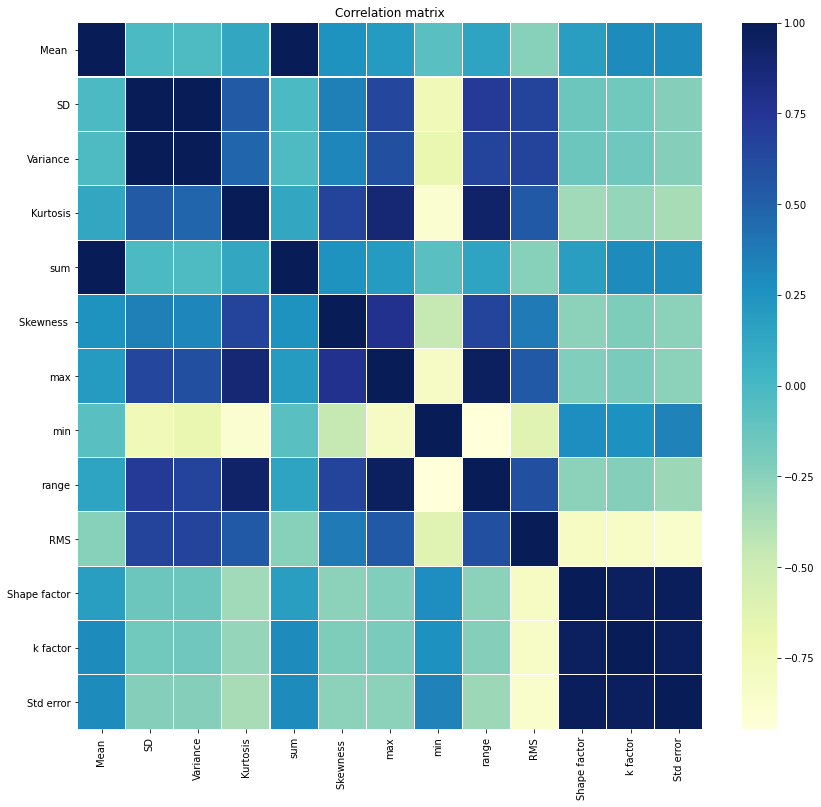

In [ ]:
'''
To check the correlation between the top 13 selected features
'''
correlation_matrix_for_13_features = X_train_13_new.corr()

f, ax = plt.subplots(figsize =(14, 13))

plt.title('Correlation matrix')
plt.savefig
sns.heatmap(correlation_matrix_for_13_features, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

# FINAL FEATURES TILL NOW ARE:-

['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor']

11 FEATURES IN TOTAL

We removed "k factor" and "Std error" because, they both are highly correlated with "Shape factor". And so I am keeping only one feature out of the 3. The reason behind doing the same is that, if any feature's datapoint is an anonaly or is an ooutlier, then it will have a negative impact on the rest 2 features. As the model has learnt that these 3 features are highly positively correlated and will give a wrong output because of just 1 anomaly or outlier. 

I am remoing features with positive correlation and keeping the features having high negative correlation as this is useful for the model to make decisions and even if it a high negative correlation I will not drop it. 




In [ ]:
X_train_11_final = X_train[['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor']]
X_test_11_final = X_test[['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor']]

print(X_train_11_final.shape, X_test_11_final.shape)

(250, 11) (50, 11)


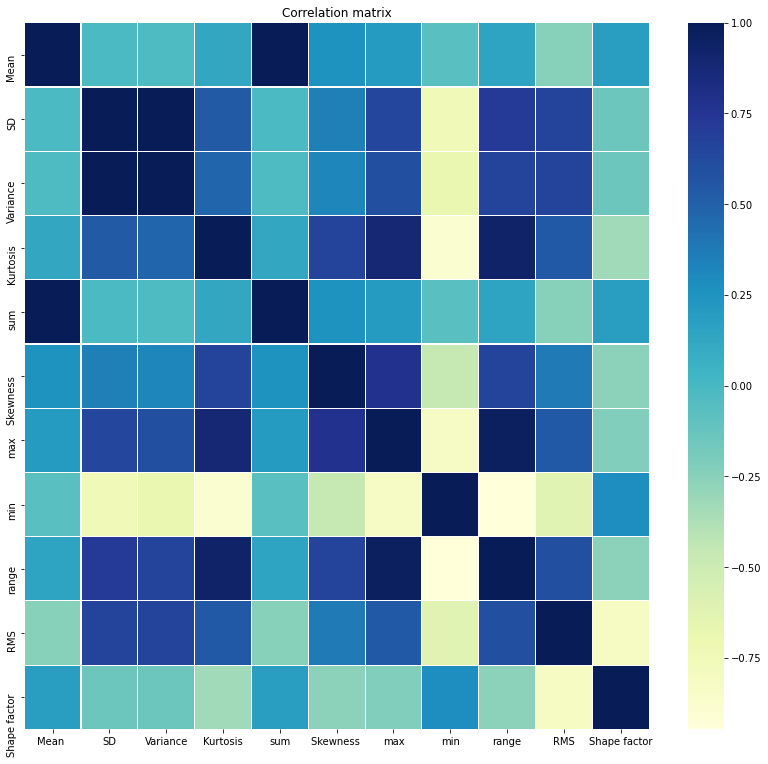

In [ ]:
'''
To check the correlation between the top 11 selected features
'''
correlation_matrix_for_11_features = X_train_11_final.corr()

f, ax = plt.subplots(figsize =(14, 13))

plt.title('Correlation matrix')

sns.heatmap(correlation_matrix_for_11_features, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

**So after seeing the above correlation matrix, I am going to remove the "Variance" feature as Variance and Standard Deviation are highly correlated with each other. And Variance being the square of Standard Deviation, by squaring the value, we could be increasing the percentage of anomaly in the data and so I am dropping the "Variance" feature**

In [ ]:
'''
Dropping the "Variance" column
'''
X_train_new = X_train_11_final.drop(['Variance'], axis = 1)
X_test_new = X_test_11_final.drop(['Variance'], axis = 1)

print(X_train_new.shape, X_test_new.shape)

(250, 10) (50, 10)


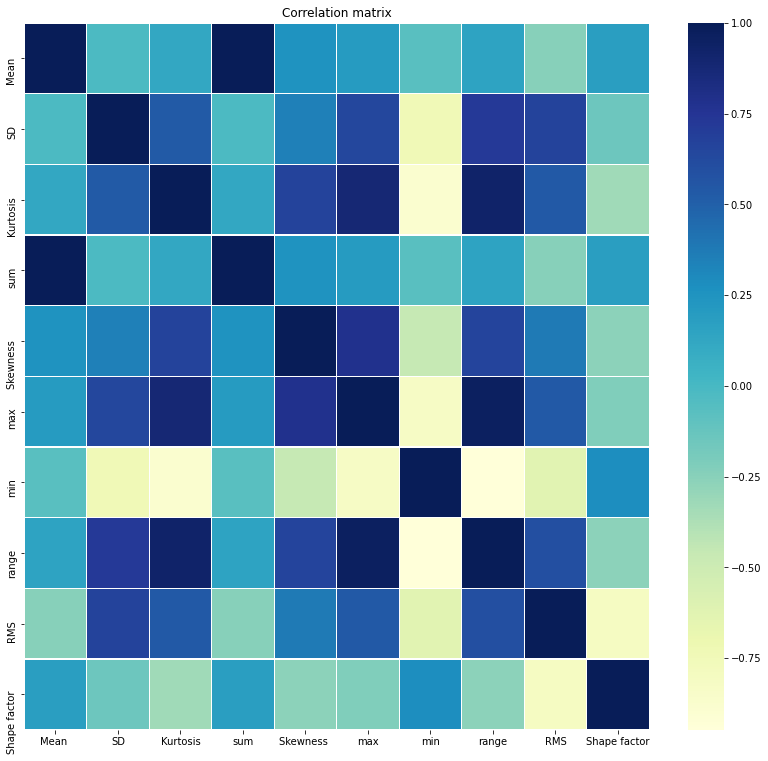

In [ ]:
'''
To check the correlation between the top 10 selected features
'''
#fig = plt.figure()
correlation_matrix_for_10_features = X_train_new.corr()

f, ax = plt.subplots(figsize =(14, 13))


plt.title('Correlation matrix')
plt.savefig("Final_correlation_matrix")

#f.savefig("Final_correlation_matrix")


sns.heatmap(correlation_matrix_for_10_features, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [ ]:
print(type(X_train_new), X_train_new.shape)
print(type(Y_train), Y_train.shape)
X_train_new.columns

<class 'pandas.core.frame.DataFrame'> (250, 10)
<class 'numpy.ndarray'> (250,)


Index(['Mean ', 'SD', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range',
       'RMS', 'Shape factor'],
      dtype='object')

(250, 3) <class 'numpy.ndarray'>


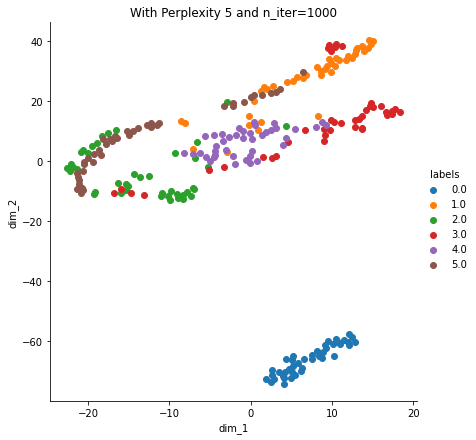

In [ ]:
tsne_df = return_TSNE_data(X_train_new, Y_train)

sns.FacetGrid(tsne_df, hue='labels', size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.title('With Perplexity 5 and n_iter=1000')
("Final_data_visualization")
plt.show()

**As you can see from the above plot that our data distribution has also improved slightly**

# FINAL FEATURES TILL NOW ARE:- 

['Mean ', 'SD', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor']

10 FEATURES IN TOTAL

In [ ]:
X_train_new.head()

,Mean,SD,Kurtosis,sum,Skewness,max,min,range,RMS,Shape factor
287,0.009181,0.416964,5.941319,110.167944,0.274380,3.844778,-2.121655,5.966434,0.417048,45.426782
175,0.012859,0.563631,18.972485,154.305820,0.211248,6.289679,-5.260687,11.550366,0.563754,43.841805
71,0.015342,0.432226,12.982116,184.106808,0.693773,5.772517,-3.010012,8.782530,0.432480,28.188849
282,0.010423,0.409318,3.955840,125.074418,0.050947,2.566720,-2.379374,4.946094,0.409434,39.282248
65,0.013495,0.404747,7.358580,161.940549,0.094428,3.878042,-4.197384,8.075426,0.404955,30.007649


In [ ]:
'''
to define certain parameters before writing the optimization code
'''


def initialize_population_locations():

  # to store the regularization and gamma (the parameters of SVM)
  parameters_list = []

  total_population = 30
  number_of_clans = 6
  population_in_each_clan = (total_population)/(number_of_clans)


  # to randomly initialize the regularization parameter in gamma values such that we have 50 of them
  reg_parameter = np.random.uniform(low = 0, high = 500, size = total_population)
  gamma = np.random.uniform(low = 0, high = 50, size = total_population)

  for i,j in zip(reg_parameter, gamma):
    parameters_list.append([round(i, 5),round(j, 5)])


  return total_population, number_of_clans, population_in_each_clan, parameters_list

In [ ]:
'''
to create a function which takes in the input parameters, data and returns the FITNESS of the parameters by calculating the accuracy
using K-Fold CV
'''


def fitness_calculation(parameters, X, Y):

  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import KFold

  # to create a list which wil store the accuracy of all the elephants i.e. SVM parameters
  accuracy_list = []

  # to reset the index of the data which is passed to the function
  X = X.reset_index(drop=True)

  # to store the final accuracy for each parameter i.e. the elephant
  final_accuracy = []

  '''
  so now, my training data which is of the size (100,4) will be split into 4 folds, where everytime it will be validated on each fold
  and trained on the remaining 3 folds. 
  ''' 
  kf = KFold(n_splits = 10, random_state = None, shuffle = False)

  for i in range(len(parameters)):

    total_score = 0

    for train_index, test_index in kf.split(X):

      X_train_fold, X_cv_fold = X.iloc[train_index], X.iloc[test_index]
      Y_train_fold, Y_cv_fold = Y[train_index], Y[test_index]

      # now to use this data to train the model and store the validation accuracy for every fold
      svm_model = SVC(C = parameters[i][0], kernel='rbf', gamma = parameters[i][1], verbose = False)
      svm_model.fit(X_train_fold, Y_train_fold)

      predicted_value = svm_model.predict(X_cv_fold)
      score = accuracy_score(Y_cv_fold, predicted_value)

      total_score = total_score + score

    final_accuracy.append(total_score/10)

  return final_accuracy

In [ ]:
'''
To create  function which will take in parameters and the accuracies as the input and will return the sorted order as the output. Here
I will also consider the number of clans and divide the number of elephants into those clans after sorting them. 
'''


def sort_elephants(accuracies, parameters):

  accuracy_index_dict = dict()

  for i in range(len(accuracies)):
    accuracy_index_dict[i] = accuracies[i]

  # to sort the elements stored in the accuray_index_dict. We are using reverse = TRUE
  sorted_accuracy_index_dict = {k:v for k,v in sorted(accuracy_index_dict.items(), key = lambda item : item[1], reverse = True)}

  '''
  now to take the sorted_accuracy_index_dict, extra the index values and the corrresponding parameters fitness, store them in a list 
  and then divide it into 3 parts
  '''
  # first to extra the keys from the sorted dictionary and and index the parameters accordingly
  keys = sorted_accuracy_index_dict.keys()

  sorted_parameters = []

  for i in keys:
    sorted_parameters.append(parameters[i])

  # to convert the list into a numpy array so that we can divide the array into 3 parts. The output that we get is an array of arrays
  splitted_array = np.array_split(sorted_parameters, 6)

  return splitted_array

In [ ]:
'''
THIS FUNCTION CONTAINS THE ENTIRE PIPELINE (I.E. WORKFLOW OF EHO). All the definitions are called in this function and the 
CLAN UPDATING AND SEPRARTING OPERATOR are used here. The equivalent terminologies are as follows:-
'''


def EHO(epochs, X_train, Y_train):

  # to initialize the elephant population i.e. to initialize the SVM parameters
  total_population, number_of_clans, population_in_each_clan, parameters_list = initialize_population_locations()
  #print("Population in each clan is:- ", population_in_each_clan)

  # to evaluate the fitness of these SVM parameters i.e. to evaluate the elephant fitness
  final_accuracies = fitness_calculation(parameters_list, X_train, Y_train)

  # to store the maximum accuracy that I got after every epoch i.e. the elephant generation
  best_accuracy_after_every_epoch  = []

  # to store the parameters that I got after every epoch i.e. elephant generation that gave the maximum accuracy
  best_parameter_after_every_epoch = []


  for i in range(epochs):

    new_parameters_list = []

    # to sort the initial parameters i.e. the rearrange the elephant positions according to their fitness
    sorted_elephants_in_clans = sort_elephants(final_accuracies, parameters_list)

    '''
    After sotring the all the SVM parameters (elephants) according to their fitness, I am applying the clan updating operator.
    The clan operating operator depends upon the matriarch which is nothing but the fitness elephant in that particular clan.
    So I will select the first element of every clan and treat it as the MATRIARCH
    '''
    for clan_number in range(len(sorted_elephants_in_clans)):

      sum_of_parameters = 0


      for elephant_number in range(len(sorted_elephants_in_clans[clan_number])):
        # the uniform distribution "r" value to be used in the CLAN UPDATING OPERATOR
        r = np.random.uniform(low = 0, high = 1)
        #r = 0.5

        # the uniform distribution "rand" value which is going to be used in the SEPARATING OPERATOR
        rand = np.random.uniform(low = 0, high = 1)
        #rand = 0.5

        # this determines the influence of the best elephant to the elephants in the clan
        #alpha = np.random.uniform(low = 0, high = 1)
        alpha = 0.5

        # this determines the factor that influences the x_center
        #beta = np.random.uniform(low = 0, high = 1)
        beta = 0.5


        if elephant_number == 0:
          '''
          this is to just assign the MATRIARCH in order to update the position of the rest of the elephants
          '''
          MATRIARCH = sorted_elephants_in_clans[clan_number][elephant_number]
          #print("MATRIARCH:- ", MATRIARCH)


        if elephant_number != 0 and elephant_number != population_in_each_clan - 1:
          '''
          the formula written below is for the CLAN UPDATING OPERATOR
          '''
          # to extract the original parameters i.e. the initial elephant
          X_original = sorted_elephants_in_clans[clan_number][elephant_number]
          #print("ORIGINAL DATAPOINT:- ", X_original)

          X_new = X_original + alpha * (MATRIARCH - X_original) * r
          #print("New datapoint:- ", X_new)

          new_parameters_list.append(X_new)


        if elephant_number == 0:
          '''
          to calculate the X_centre i.e. the determine the centre of each clan. This is a part of CLAN UPDATING OPERATOR
          '''
          for i in sorted_elephants_in_clans[clan_number]:
            sum_of_parameters = sum_of_parameters + i

          X_centre = (sum_of_parameters) / (population_in_each_clan)
          X_new = beta * X_centre

          new_parameters_list.append(X_new)

        
        if elephant_number == population_in_each_clan - 1:
          '''
          to apply the CLAN SEPARATING OPERATOR as this is the worst elephant in the clan
          '''
          # to extract the minimum value or the lower bound and the upper bound to the regularization parameter i.e. C
          X_new_0_min = min(x[0] for x in parameters_list)
          X_new_0_max = max(x[0] for x in parameters_list)

          # to extract the minimum value i.e. the lower bound and the upper bound to the gamma parameter
          X_new_1_min = min(x[1] for x in parameters_list)
          X_new_1_max = max(x[1] for x in parameters_list)


          # to use the SEPARATING OPREATOR FORMULA to reset REGULARIZATION PARAMETER
          new_reg_parameter = X_new_0_min + (X_new_0_max - X_new_0_min + 1) * rand

          # to use the SEPARATING OPERATOR to reset the GAMMA PARAMETER
          new_gamma_parameter = X_new_1_min + (X_new_1_max - X_new_1_min + 1) * rand

          X_new = [new_reg_parameter, new_gamma_parameter]
          X_new = np.array(X_new)

          new_parameters_list.append(X_new)

      #print("=================================END OF CLAN===================================")


    '''
    to assign the new parameters found by using the CLAN UPDATING AND THE CLAN SEPARATING OPERATOR to the "parameters_list" variable
    '''
    parameters_list = new_parameters_list

    #print("The updated parameters list is:- ", parameters_list)

    '''
    considering the new parameters and finding out the fitness value of these newly formed parameters
    '''
    new_accuracies = fitness_calculation(parameters_list, X_train, Y_train)

    # to extract the maximum accuracy and the correspodning index value. After that, to use this index value to extract the corresponding parameters.
    best_accuracy_after_every_epoch.append(max(new_accuracies))

    index_value = new_accuracies.index(max(new_accuracies))

    best_parameter_after_every_epoch.append(parameters_list[index_value])

    # to assign the "new_accuracies" to the "final_accuracies" so that I can pass it to the "SORT_ELEPHANTS" function in the next epoch i.e. next generation
    final_accuracies = new_accuracies

    print('FINAL ACCURACY IS: ', final_accuracies)
    print("BEST PARAMETER IS: ", parameters_list[index_value])
    print("THE BEST ACCURACY IS: ", max(new_accuracies))
    print("="*80)

    #break;


In [ ]:
'''
to standardize the data before passing it to the models
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_new_standardized = scaler.fit_transform(X_train_new)
X_test_new_standardized = scaler.transform(X_test_new)

X_train_new_standardized = pd.DataFrame(X_train_new_standardized)
X_test_new_standardized = pd.DataFrame(X_test_new_standardized)

print(type(X_train_new_standardized), X_train_new_standardized.shape)
print(type(X_test_new_standardized), X_test_new_standardized.shape)

<class 'pandas.core.frame.DataFrame'> (250, 10)
<class 'pandas.core.frame.DataFrame'> (50, 10)


(250, 3) <class 'numpy.ndarray'>


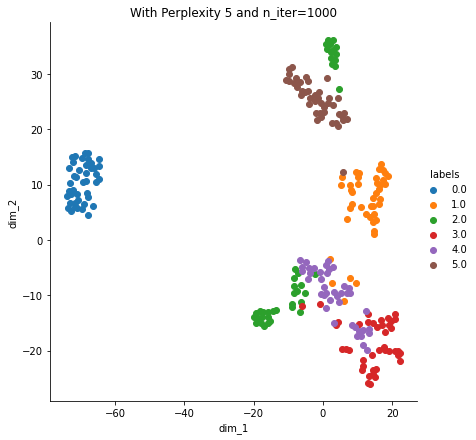

In [ ]:
tsne_df = return_TSNE_data(X_train_new_standardized, Y_train)

sns.FacetGrid(tsne_df, hue='labels', size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.title('With Perplexity 5 and n_iter=1000')
plt.savefig("Final_data_visualization")
plt.show()

**TO LOAD THE PREPROCESSED DATASET**


In [ ]:
final_training_df = pd.read_csv(r'/content/drive/MyDrive/Research Paper/DATA/final_training_df.csv')
final_testing_df = pd.read_csv(r'/content/drive/MyDrive/Research Paper/DATA/final_testing_df.csv')

print(final_training_df.shape)
print(final_testing_df.shape)
print("The Datasets have been loaded...")

(250, 11)
(50, 11)
The Datasets have been loaded...


In [ ]:
X_train = final_training_df.drop(['condition'], axis = 1)
Y_train = final_training_df['condition']

Y_train = np.array(Y_train)

X_test = final_testing_df.drop(['condition'], axis = 1)
Y_test = final_testing_df['condition']

Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(250, 10) (250,)
(50, 10) (50,)


In [ ]:
EHO(1, X_train, Y_train)

PRINTING THE VALUE OF i :-  [172.46592   0.79582]
PRINTING THE VALUE OF i :-  [435.97064   2.01448]
PRINTING THE VALUE OF i :-  [59.316    2.94834]
PRINTING THE VALUE OF i :-  [415.10097   8.73529]
PRINTING THE VALUE OF i :-  [199.52797  10.52466]
PRINTING THE VALUE OF i :-  [58.07983 10.61025]
PRINTING THE VALUE OF i :-  [485.16762  10.52735]
PRINTING THE VALUE OF i :-  [13.90828 11.33854]
PRINTING THE VALUE OF i :-  [424.31553  13.01137]
PRINTING THE VALUE OF i :-  [428.92945  15.97025]
PRINTING THE VALUE OF i :-  [207.63769  16.53163]
PRINTING THE VALUE OF i :-  [474.34553  20.3285 ]
PRINTING THE VALUE OF i :-  [469.95971  20.71735]
PRINTING THE VALUE OF i :-  [239.82205  22.85486]
PRINTING THE VALUE OF i :-  [354.80854  22.88713]
PRINTING THE VALUE OF i :-  [19.41379 26.85002]
PRINTING THE VALUE OF i :-  [455.43911  27.35925]
PRINTING THE VALUE OF i :-  [150.68283  27.52791]
PRINTING THE VALUE OF i :-  [111.19876  31.30599]
PRINTING THE VALUE OF i :-  [26.92725 30.25434]
PRINTING T

In [ ]:
#[1.45949143, 0.26917001] 94.44%
# [2.11476091, 0.23915122] 94.48%
# [1.52462373, 0.14254683] 93.59%
# [2.44777614, 0.21400747] 95.2%        BEST        [2.60187031, 0.19514524]

from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', C = 2.99187031, gamma = 0.17514524, verbose = 1)
clf.fit(X_train_new_standardized, Y_train)

test_predicted_output = clf.predict(X_test_new_standardized)
train_predicted_output = clf.predict(X_train_new_standardized)

testing_accuracy = accuracy_score(Y_test, test_predicted_output)
training_accuracy = accuracy_score(Y_train, train_predicted_output)

print("The TESTING ACCURACY IS:- ", testing_accuracy)
print('The TRAINING ACCURACY IS:- ', training_accuracy)

[LibSVM]The TESTING ACCURACY IS:-  0.9
The TRAINING ACCURACY IS:-  0.976


In [ ]:
def plot_confusion_matrix(test_y, predict_y):

  from sklearn.metrics import confusion_matrix

  C = confusion_matrix(test_y, predict_y)
  
  print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100, '%')

 
  labels = [0,1,2,3,4,5]
  cmap=sns.light_palette("green")
  
  '''
  CONFUSION MATRIX
  '''
  print("-"*50, "Confusion matrix", "-"*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

Number of misclassified points  2.4 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


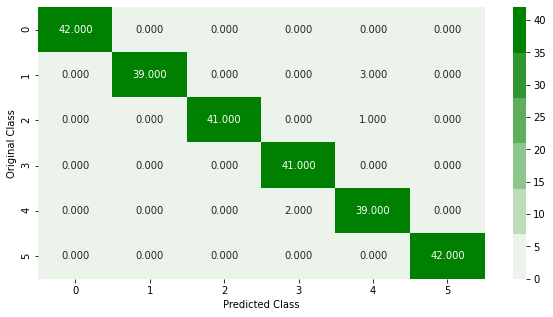

In [ ]:
'''
FOR TRAINING DATA POINTS
'''
plot_confusion_matrix(Y_train, train_predicted_output)

Number of misclassified points  10.0 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


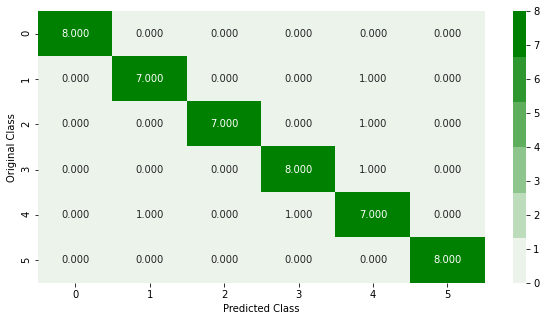

In [ ]:
'''
FOR TESTING DATA POINTS
'''
plot_confusion_matrix(Y_test, test_predicted_output)

**To store the final preprocessed datasets**

In [ ]:
# to combine the X_train and Y_train and make them a single TRAINING DATASET
Y_train_df = pd.DataFrame(Y_train)

Y_train_df.columns = ['condition']

Y_train_df.head()

,condition
0,5
1,3
2,1
3,5
4,1


In [ ]:
X_train_new_standardized.columns = ['Mean ', 'SD', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor']

print(X_train_new_standardized.shape)

X_train_new_standardized.head()

(250, 10)


,Mean,SD,Kurtosis,sum,Skewness,max,min,range,RMS,Shape factor
0,-1.166491,-0.641888,-0.631950,-1.166651,0.326382,-0.407618,1.058829,-0.740012,0.033720,-0.413015
1,0.389329,0.830822,1.604929,0.389247,0.082017,1.090784,-1.204128,1.196487,0.744678,-0.432032
2,1.439655,-0.488640,0.576646,1.439758,1.949726,0.773832,0.418404,0.236606,0.108506,-0.619835
3,-0.641116,-0.718663,-0.972769,-0.641185,-0.538460,-1.190899,0.873037,-1.093864,-0.003179,-0.486737
4,0.658361,-0.764562,-0.388668,0.658378,-0.370158,-0.387232,-0.437583,-0.008617,-0.024884,-0.598013


In [ ]:
final_training_df = pd.concat([X_train_new_standardized, Y_train_df], axis = 1)

print(final_training_df.shape)

final_training_df.head()

(250, 11)


,Mean,SD,Kurtosis,sum,Skewness,max,min,range,RMS,Shape factor,condition
0,-1.166491,-0.641888,-0.631950,-1.166651,0.326382,-0.407618,1.058829,-0.740012,0.033720,-0.413015,5
1,0.389329,0.830822,1.604929,0.389247,0.082017,1.090784,-1.204128,1.196487,0.744678,-0.432032,3
2,1.439655,-0.488640,0.576646,1.439758,1.949726,0.773832,0.418404,0.236606,0.108506,-0.619835,1
3,-0.641116,-0.718663,-0.972769,-0.641185,-0.538460,-1.190899,0.873037,-1.093864,-0.003179,-0.486737,5
4,0.658361,-0.764562,-0.388668,0.658378,-0.370158,-0.387232,-0.437583,-0.008617,-0.024884,-0.598013,1


In [ ]:
# to combine the TEST dataframes
X_test_new_standardized.columns = ['Mean ', 'SD', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor']

Y_test_df = pd.DataFrame(Y_test)
Y_test_df.columns = ['condition']

final_testing_df = pd.concat([X_test_new_standardized, Y_test_df], axis = 1)

print(final_testing_df.shape)

final_testing_df.head()

(50, 11)


,Mean,SD,Kurtosis,sum,Skewness,max,min,range,RMS,Shape factor,condition
0,-0.460915,-0.860746,-1.036939,-0.460855,-0.569580,-1.479807,1.343628,-1.483727,-0.071674,-0.520886,5
1,-0.224031,-0.100869,0.983163,-0.224191,0.073753,0.313520,-0.810453,0.567283,0.294995,-0.462754,4
2,-0.336128,0.531163,1.835477,-0.336130,2.019024,2.423654,-0.684162,1.700572,0.599914,-0.383252,4
3,0.331800,-0.372152,-0.920667,0.331941,-0.372720,-1.306980,0.615906,-1.035855,-1.967718,1.283732,0
4,0.415132,-0.535673,-0.822137,0.415019,-0.178914,-0.447551,0.309443,-0.402112,-1.968440,2.551908,0


In [ ]:
'''
to store both the dataframes as "CSV" files
'''
final_training_df.to_csv(path_or_buf = r'/content/drive/MyDrive/Research Paper/DATA/final_training_df.csv', index = False)

final_testing_df.to_csv(path_or_buf = r'/content/drive/MyDrive/Research Paper/DATA/final_testing_df.csv', index = False)

print("The Datasets have been stored....")

The Datasets have been stored....
